In [63]:
# Packages Imports
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import powerlaw
import seaborn as sns

Helper Functions that would be used in this analysis

In [5]:
# Read all text files into a single table

def get_data(zip_path):
    with zipfile.ZipFile(zip_path) as zf:
        return  pd.concat(
                    [pd.read_csv(zf.open(f),
                                 header=None, 
                                 names=['State', 'Gender', 'Year', 'Name', 'Count'])
                     for f in zf.namelist() if f.endswith("TXT")],
                ignore_index=True)


In [6]:
# Get data from the source folder
zip_path = 'Data/namesbystate.zip'
df = get_data(zip_path)

# Display the first 5 enteries
df.head(5)

,State,Gender,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


<AxesSubplot:ylabel='Frequency'>

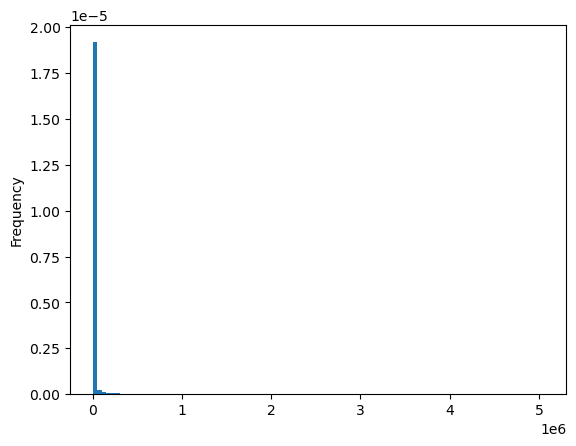

In [88]:
## Lets quickly check the distribution of the names

data = df.groupby("Name").Count.sum()

data.plot.hist(bins=100,density=True)

# at first inspection the data looks like a power Law distrubtion

# It is reasonable to assume that the baby names dataset will exhibit a power law distribution
# since a few names are very popular while many others are relatively rare.

# lets test the hypothesis

The data follows a power law distribution


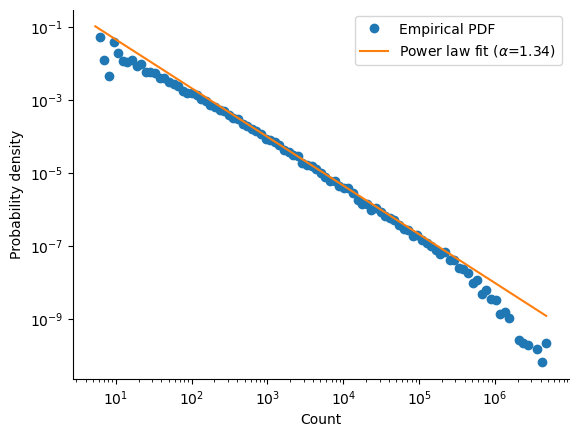

In [89]:
# power law function of the form f(x) ~ x^(-alpha), where x is the variable and alpha is the scaling parameter.


# calculate the empirical probability density function

#the PDF of a real-world dataset is usually not known beforehand, so we need to estimate it from the data.
#One way to do this is to calculate the empirical PDF, which estimates the probability density of the data by 
#counting the number of data points that fall within small intervals or "bins" along the range of the data.

#np.histogram is used to calculate the counts and the edges of the histogram for the name_summed dataset. 
#The bins parameter is set to np.logspace(np.log10(data.min()), np.log10(data.max()), 50), 
#which creates 50 logarithmically spaced bins between the minimum and the maximum values of the data. 
#This ensures that the bins are equally spaced on a logarithmic scale, which is important for analyzing power 
#law distributions.



bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 100)
counts, edges = np.histogram(data, bins=bins, density=True)
x = (edges[:-1] + edges[1:]) / 2
# plot the empirical PDF
plt.plot(x, counts, 'o', label='Empirical PDF')





# This formula is derived from the log-likelihood function for a power law distribution, which is given by:

# log_likelihood = -n * np.log(alpha) - (1 + alpha) * np.sum(np.log(data / xmin))

# where n is the number of observations in the data, alpha is the scaling parameter to be estimated, data is the dataset,
# and xmin is the minimum value at which the power law behavior starts.

# The formula alpha = 1 + len(data) / np.sum(np.log(data / data.min())) is obtained by setting the derivative
# of the log-likelihood function with respect to alpha equal to zero and solving for alpha.

# fit the data to a power law distribution
alpha = 1 + len(data) / np.sum(np.log(data / data.min()))
y = x ** -alpha
plt.plot(x, y, label=f'Power law fit ($\\alpha$={alpha:.2f})')

# set plot properties
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Count')
plt.ylabel('Probability density')
plt.legend()
sns.despine()


if alpha > 1:
    print("The data follows a power law distribution")
else:
    print("The data does not follow a power law distribution")